In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score


In [5]:
# center_surround
data_center = pd.read_csv("/content/center_surround_train.csv")
val_data_center = pd.read_csv("/content/center_surround_valid.csv")
test_data_center = pd.read_csv("/content/center_surround_test.csv")

In [7]:
# spiral
data_spiral = pd.read_csv("/content/spiral_train.csv")
val_data_spiral = pd.read_csv("/content/spiral_valid.csv")
test_data_spiral = pd.read_csv("/content/spiral_test.csv")

In [8]:
# two_gaussians
data_gaussian = pd.read_csv("/content/two_gaussians_train.csv")
val_data_gaussian = pd.read_csv("/content/two_gaussians_valid.csv")
test_data_gaussian = pd.read_csv("/content/two_gaussians_test.csv")

In [6]:
# xor
data_xor = pd.read_csv("/content/xor_train.csv")
val_data_xor = pd.read_csv("/content/xor_valid.csv")
test_data_xor = pd.read_csv("/content/xor_test.csv")


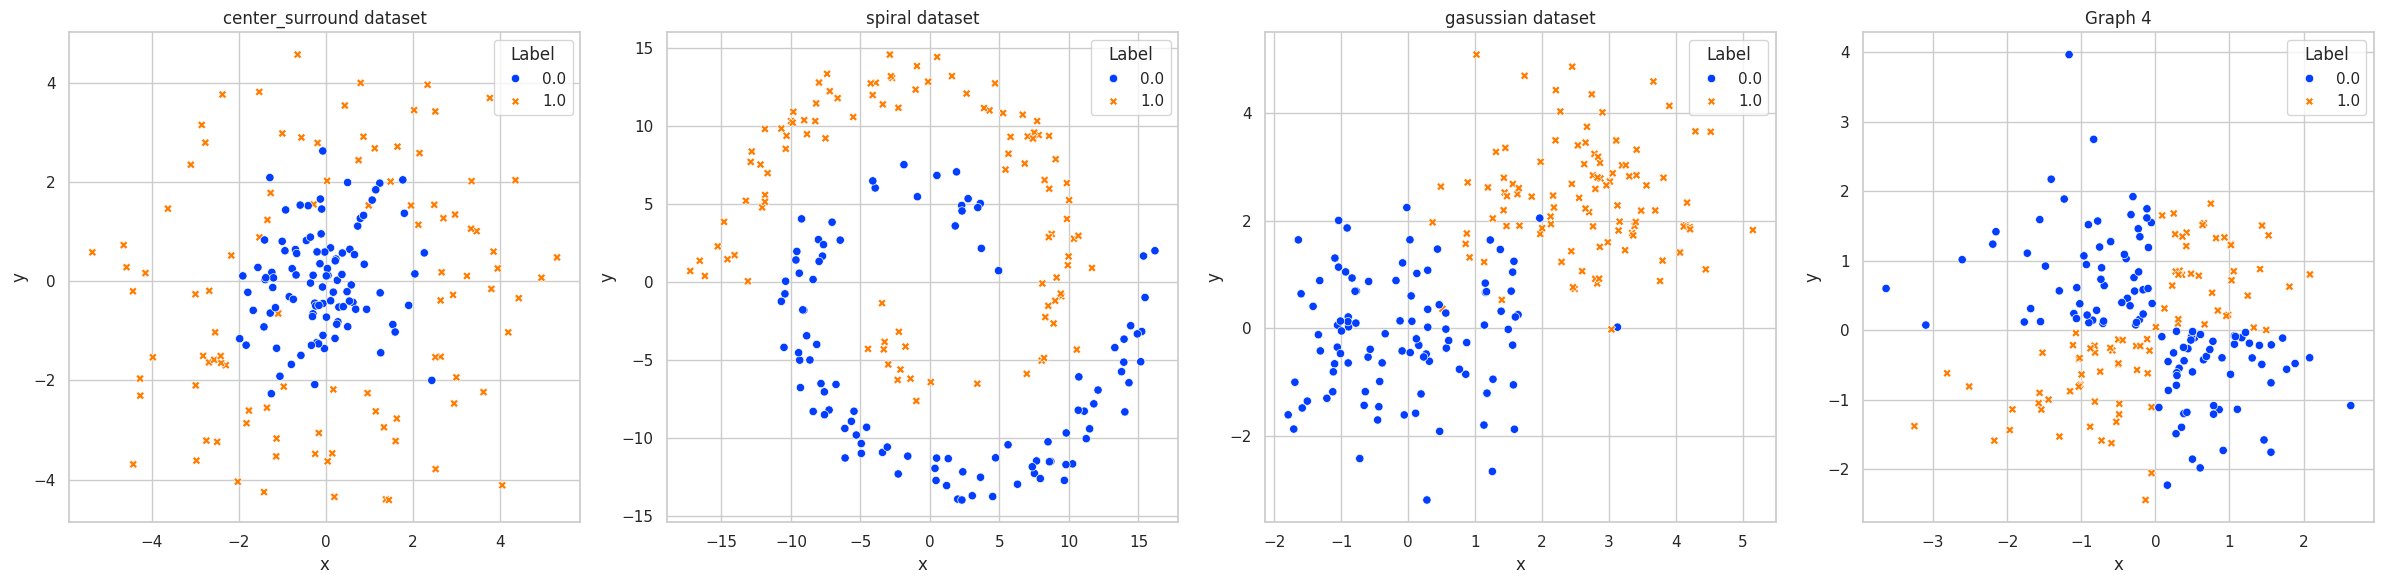

In [9]:
# Set the style of seaborn
sns.set(style="whitegrid")


plt.figure(figsize=(24, 6))

# Plot for the first dataset
plt.subplot(1, 4, 1)
sns.scatterplot(data=data_center, x='x1', y='x2', hue='label', palette='bright', style='label')
plt.title('center_surround dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Label', loc='upper right')

# Plot for the second dataset
plt.subplot(1, 4, 2)
sns.scatterplot(data=data_spiral, x='x1', y='x2', hue='label', palette='bright', style='label')
plt.title('spiral dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Label', loc='upper right')

# Plot for the third dataset
plt.subplot(1, 4, 3)
sns.scatterplot(data=data_gaussian, x='x1', y='x2', hue='label', palette='bright', style='label')
plt.title('gasussian dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Label', loc='upper right')

# Plot for the fourth dataset
plt.subplot(1, 4, 4)
sns.scatterplot(data=data_xor, x='x1', y='x2', hue='label', palette='bright', style='label')
plt.title('Graph 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Label', loc='upper right')


plt.tight_layout()

plt.show()


# Question 1

In [10]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_weight = np.random.rand(input_size, hidden_size)
        self.output_weight = np.random.rand(hidden_size, output_size)
        self.hidden_bias = np.random.rand(hidden_size)
        self.output_bias = np.random.rand(output_size)
        self.learning_rate = learning_rate
        self.train_losses = []
        self.val_losses = []

    def activation_function(self, x):
        activation = 1/(1+np.exp(-x))
        return activation

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.input_weight) + self.hidden_bias
        self.hidden_output = self.activation_function(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.output_weight) + self.output_bias
        self.output = self.activation_function(self.output_input)
        return self.output

    def backward_pass(self, X, y):
        y = y.reshape(self.output.shape)
        error = y - self.output

        new_output = error * self.output * (1-self.output)
        grad_output_weight = self.hidden_output.T.dot(new_output)

        hidden_error = new_output.dot(self.output_weight.T) * self.hidden_output * (1 - self.hidden_output)
        grad_input_weight = X.T.dot(hidden_error)

        self.output_weight += grad_output_weight * self.learning_rate
        self.input_weight += grad_input_weight * self.learning_rate
        self.hidden_bias += np.sum(hidden_error, axis = 0) * self.learning_rate
        self.output_bias += np.sum(new_output, axis = 0) * self.learning_rate

    def train(self, X, y, X_val, y_val, epochs):
        for epoch in range(epochs):
            self.forward_pass(X)
            self.backward_pass(X, y)
            # binary ccross entropy
            train_loss = np.mean(-y * np.log(self.output) - (1 - y) * np.log(1 - self.output))
            self.train_losses.append(train_loss)

            # Validation loss
            val_output = self.forward_pass(X_val)
            # binary ccross entropy
            val_loss = np.mean(-y_val * np.log(val_output) - (1 - y_val) * np.log(1 - val_output))
            self.val_losses.append(val_loss)

    def compute_accuracy(self, X_test, y_test):
        predictions = self.forward_pass(X_test) > 0.5
        accuracy = np.mean(predictions == y_test.reshape(predictions.shape))
        return accuracy

    def plot_learning_curves(self):
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title('Learning Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def predict(self, X):
        output = self.forward_pass(X)
        return output > 0.5

    def plot_decision_surface(self, X, y):
        # Create a mesh to plot the decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict each point in the mesh
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()






## **1. center_surround dataset**

choosing best k:

In [35]:
X = data_center.drop('label', axis = 1).values
y = data_center['label'].values

X_val = val_data_center.drop('label', axis = 1).values
y_val = val_data_center['label'].values

X_test = test_data_center.drop('label', axis = 1).values
y_test = test_data_center['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=200)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k}, Accuracy: {model_performance[best_k - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.7057
Hidden Size: 6, Average Accuracy: 0.7063
Hidden Size: 7, Average Accuracy: 0.7015
Hidden Size: 8, Average Accuracy: 0.7038
Hidden Size: 9, Average Accuracy: 0.7012
Hidden Size: 10, Average Accuracy: 0.7020
Hidden Size: 11, Average Accuracy: 0.7063
Hidden Size: 12, Average Accuracy: 0.7077
Hidden Size: 13, Average Accuracy: 0.7052
Hidden Size: 14, Average Accuracy: 0.7020
Hidden Size: 15, Average Accuracy: 0.7032
Hidden Size: 16, Average Accuracy: 0.7055
Hidden Size: 17, Average Accuracy: 0.7042
Hidden Size: 18, Average Accuracy: 0.6985
Hidden Size: 19, Average Accuracy: 0.6602
Hidden Size: 20, Average Accuracy: 0.7002
Hidden Size: 21, Average Accuracy: 0.6590
Hidden Size: 22, Average Accuracy: 0.6440
Hidden Size: 23, Average Accuracy: 0.6273
Hidden Size: 24, Average Accuracy: 0.6053
Hidden Size: 25, Average Accuracy: 0.6235
Hidden Size: 26, Average Accuracy: 0.5713
Hidden Size: 27, Average Accuracy: 0.5247
Hidden Size: 28, Average Accuracy: 0.55

finding epoch numbers:

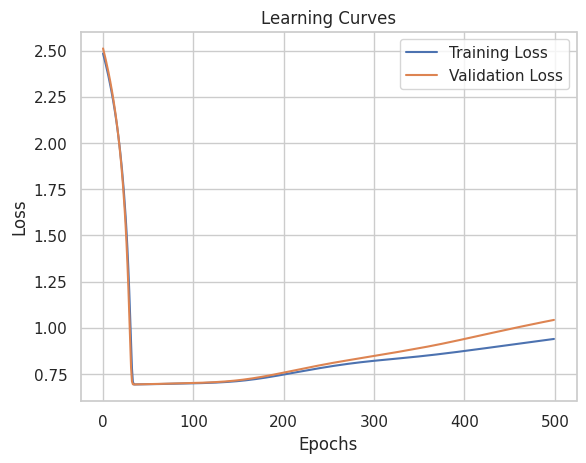

In [38]:
mlp = MLP(input_size=2, hidden_size=best_k, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=500)

mlp.plot_learning_curves()


decision plane:

accuracy: 0.725


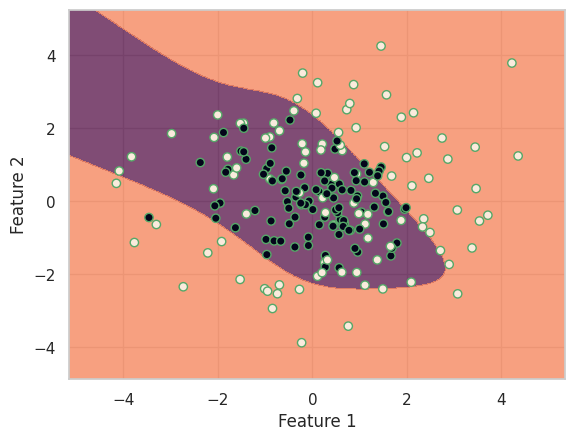

In [51]:
# you should see that when the loss increasing when the epoch number is around 200, so we choose the epoch number 200
mlp = MLP(input_size=2, hidden_size=best_k, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=200)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

## **2. Spiral Dataset**

choosing best k:

In [60]:
X = data_spiral.drop('label', axis = 1).values
y = data_spiral['label'].values

X_val = val_data_spiral.drop('label', axis = 1).values
y_val = val_data_spiral['label'].values

X_test = test_data_spiral.drop('label', axis = 1).values
y_test = test_data_spiral['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=200)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_spiral = model_performance.argmax() + 5
print(f"Best Model - best k: {best_k_spiral}, Accuracy: {model_performance[best_k_spiral - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.7965
Hidden Size: 6, Average Accuracy: 0.7978
Hidden Size: 7, Average Accuracy: 0.7965
Hidden Size: 8, Average Accuracy: 0.7967
Hidden Size: 9, Average Accuracy: 0.7998
Hidden Size: 10, Average Accuracy: 0.7990
Hidden Size: 11, Average Accuracy: 0.7985
Hidden Size: 12, Average Accuracy: 0.7977
Hidden Size: 13, Average Accuracy: 0.7973
Hidden Size: 14, Average Accuracy: 0.7970
Hidden Size: 15, Average Accuracy: 0.8005
Hidden Size: 16, Average Accuracy: 0.7980
Hidden Size: 17, Average Accuracy: 0.7975
Hidden Size: 18, Average Accuracy: 0.7967
Hidden Size: 19, Average Accuracy: 0.7983
Hidden Size: 20, Average Accuracy: 0.7978
Hidden Size: 21, Average Accuracy: 0.7988
Hidden Size: 22, Average Accuracy: 0.7947
Hidden Size: 23, Average Accuracy: 0.7993
Hidden Size: 24, Average Accuracy: 0.7963
Hidden Size: 25, Average Accuracy: 0.7972
Hidden Size: 26, Average Accuracy: 0.7992
Hidden Size: 27, Average Accuracy: 0.7998
Hidden Size: 28, Average Accuracy: 0.80

chossing epoch number:

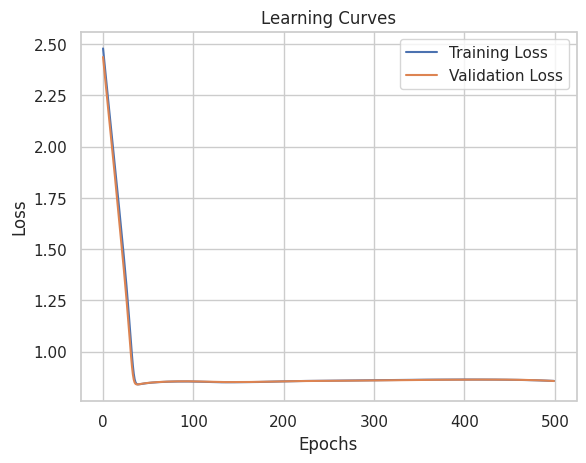

In [61]:
mlp = MLP(input_size=2, hidden_size=best_k_spiral, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=500)

mlp.plot_learning_curves()

decision plane:

accuracy: 0.805


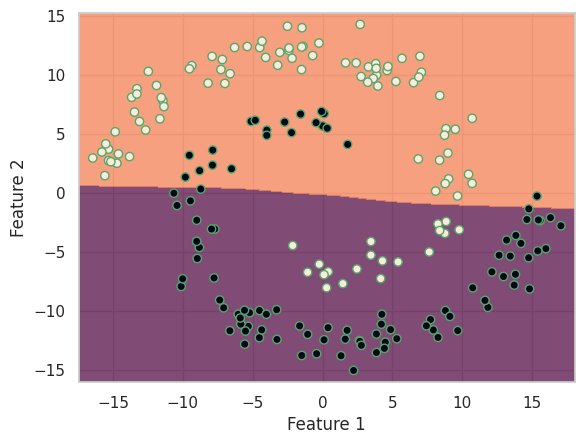

In [62]:
# you should see that when the loss increasing when the epoch number is around 200, so we choose the epoch number 200
mlp = MLP(input_size=2, hidden_size=best_k_spiral, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=200)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

## **3. Two Gaussians**

choosing best k:

In [63]:
X = data_gaussian.drop('label', axis = 1).values
y = data_gaussian['label'].values

X_val = val_data_gaussian.drop('label', axis = 1).values
y_val = val_data_gaussian['label'].values

X_test = test_data_gaussian.drop('label', axis = 1).values
y_test = test_data_gaussian['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=200)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_gaussian = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k_gaussian}, Accuracy: {model_performance[best_k_gaussian - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.9130
Hidden Size: 6, Average Accuracy: 0.9142
Hidden Size: 7, Average Accuracy: 0.9135
Hidden Size: 8, Average Accuracy: 0.9128
Hidden Size: 9, Average Accuracy: 0.9122
Hidden Size: 10, Average Accuracy: 0.9137
Hidden Size: 11, Average Accuracy: 0.9132
Hidden Size: 12, Average Accuracy: 0.9130
Hidden Size: 13, Average Accuracy: 0.9132
Hidden Size: 14, Average Accuracy: 0.9122
Hidden Size: 15, Average Accuracy: 0.9135
Hidden Size: 16, Average Accuracy: 0.9133
Hidden Size: 17, Average Accuracy: 0.9125
Hidden Size: 18, Average Accuracy: 0.9102
Hidden Size: 19, Average Accuracy: 0.9127
Hidden Size: 20, Average Accuracy: 0.9148
Hidden Size: 21, Average Accuracy: 0.8932
Hidden Size: 22, Average Accuracy: 0.9113
Hidden Size: 23, Average Accuracy: 0.8758
Hidden Size: 24, Average Accuracy: 0.8713
Hidden Size: 25, Average Accuracy: 0.8827
Hidden Size: 26, Average Accuracy: 0.8545
Hidden Size: 27, Average Accuracy: 0.8245
Hidden Size: 28, Average Accuracy: 0.85

chossing epoch number:

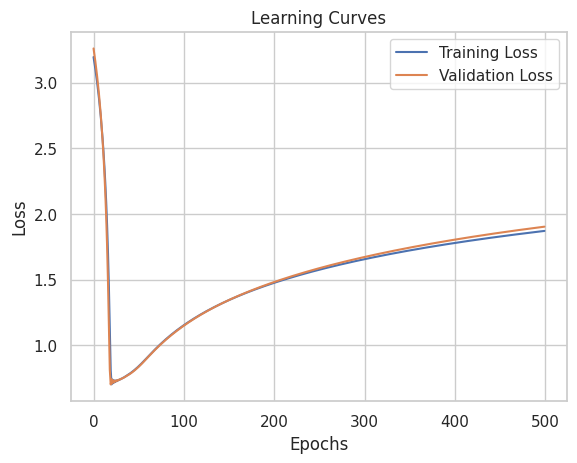

In [69]:
mlp = MLP(input_size=2, hidden_size=best_k_gaussian, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=500)

mlp.plot_learning_curves()


decision plane:

accuracy: 0.925


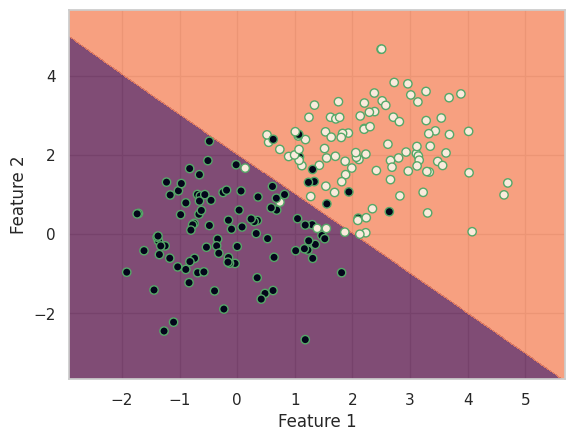

In [70]:
# you should see that when the loss increasing when the epoch number is around 200, so we choose the epoch number 200
mlp = MLP(input_size=2, hidden_size=best_k_gaussian, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=100)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

## **4. Xor dataset**

chossing best k:

In [74]:
X = data_xor.drop('label', axis = 1).values
y = data_xor['label'].values

X_val = val_data_xor.drop('label', axis = 1).values
y_val = val_data_xor['label'].values

X_test = test_data_xor.drop('label', axis = 1).values
y_test = test_data_xor['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=200)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_xor = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k_xor}, Accuracy: {model_performance[best_k_xor - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.5905
Hidden Size: 6, Average Accuracy: 0.5910
Hidden Size: 7, Average Accuracy: 0.5967
Hidden Size: 8, Average Accuracy: 0.5983
Hidden Size: 9, Average Accuracy: 0.5950
Hidden Size: 10, Average Accuracy: 0.5987
Hidden Size: 11, Average Accuracy: 0.6008
Hidden Size: 12, Average Accuracy: 0.6017
Hidden Size: 13, Average Accuracy: 0.5988
Hidden Size: 14, Average Accuracy: 0.5980
Hidden Size: 15, Average Accuracy: 0.6002
Hidden Size: 16, Average Accuracy: 0.5992
Hidden Size: 17, Average Accuracy: 0.5900
Hidden Size: 18, Average Accuracy: 0.5990
Hidden Size: 19, Average Accuracy: 0.5825
Hidden Size: 20, Average Accuracy: 0.5950
Hidden Size: 21, Average Accuracy: 0.5810
Hidden Size: 22, Average Accuracy: 0.5603
Hidden Size: 23, Average Accuracy: 0.5408
Hidden Size: 24, Average Accuracy: 0.5178
Hidden Size: 25, Average Accuracy: 0.5235
Hidden Size: 26, Average Accuracy: 0.5268
Hidden Size: 27, Average Accuracy: 0.5110
Hidden Size: 28, Average Accuracy: 0.51

choosing epoch number:

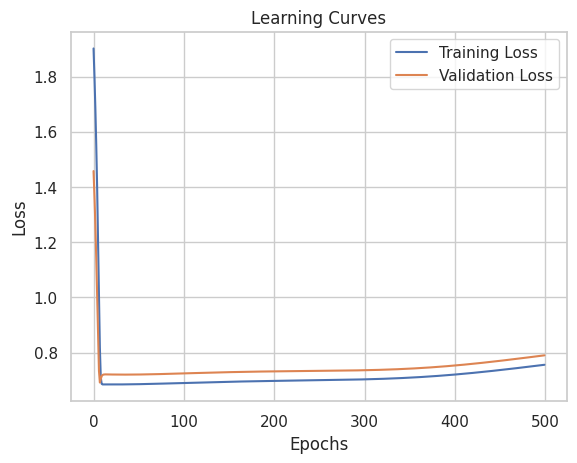

In [75]:
mlp = MLP(input_size=2, hidden_size=best_k_xor, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=500)

mlp.plot_learning_curves()

decision plane:

accuracy: 0.59


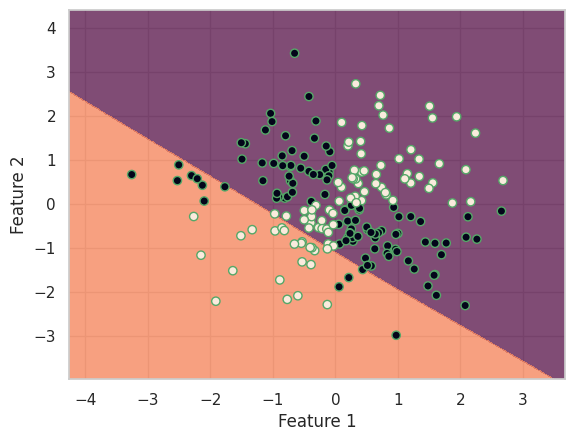

In [77]:
# you should see that when the loss increasing when the epoch number is around 200, so we choose the epoch number 200
mlp = MLP(input_size=2, hidden_size=best_k_xor, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=250)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

# Question 2
**Use mean squared error**

In [79]:
class MLP_MSE:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_weight = np.random.rand(input_size, hidden_size)
        self.output_weight = np.random.rand(hidden_size, output_size)
        self.hidden_bias = np.random.rand(hidden_size)
        self.output_bias = np.random.rand(output_size)
        self.learning_rate = learning_rate
        self.hidden_size = hidden_size
        self.train_losses = []
        self.val_losses = []

    def activation_function(self, x):
        activation = 1/(1+np.exp(-x))
        return activation

    def forward_pass(self, X):
        self.hidden_input = np.dot(X, self.input_weight) + self.hidden_bias
        self.hidden_output = self.activation_function(self.hidden_input)
        self.output_input = np.dot(self.hidden_output, self.output_weight) + self.output_bias
        self.output = self.activation_function(self.output_input)
        return self.output

    def backward_pass(self, X, y):
        y = y.reshape(self.output.shape)
        #replace it with mean square error
        MSE_derivative = -2*(y - self.output)/self.hidden_size

        new_output = MSE_derivative * self.output * (1-self.output) # the hidden layer's delta
        grad_output_weight = self.hidden_output.T.dot(new_output)# hidden layer's delta times x(output of the hidden layer)

        hidden_error = new_output.dot(self.output_weight.T) * self.hidden_output * (1 - self.hidden_output)
        grad_input_weight = X.T.dot(hidden_error)

        self.output_weight -= grad_output_weight * self.learning_rate
        self.input_weight -= grad_input_weight * self.learning_rate
        self.hidden_bias -= np.sum(hidden_error, axis = 0) * self.learning_rate
        self.output_bias -= np.sum(new_output, axis = 0) * self.learning_rate

    def train(self, X, y, X_val, y_val, epochs):
        for epoch in range(epochs):
            self.forward_pass(X)
            self.backward_pass(X, y)
            #replace it to the mean square error
            train_loss = np.mean((y.reshape(self.output.shape)-self.output)**2)
            self.train_losses.append(train_loss)

            # Validation loss
            val_output = self.forward_pass(X_val)
            val_loss = np.mean((y_val.reshape(val_output.shape)-val_output)**2)
            self.val_losses.append(val_loss)

    def compute_accuracy(self, X_test, y_test):
        predictions = self.forward_pass(X_test) > 0.5
        accuracy = np.mean(predictions == y_test.reshape(predictions.shape))
        return accuracy

    def plot_learning_curves(self):
        plt.plot(self.train_losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title('Learning Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

    def predict(self, X):
        output = self.forward_pass(X)
        return output > 0.5

    def plot_decision_surface(self, X, y):
        # Create a mesh to plot the decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict each point in the mesh
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()




## **1. center_surround dataset**

choosing best k

In [82]:
X = data_center.drop('label', axis = 1).values
y = data_center['label'].values

X_val = val_data_center.drop('label', axis = 1).values
y_val = val_data_center['label'].values

X_test = test_data_center.drop('label', axis = 1).values
y_test = test_data_center['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP_MSE(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=2000)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k}, Accuracy: {model_performance[best_k - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.7595
Hidden Size: 6, Average Accuracy: 0.7642
Hidden Size: 7, Average Accuracy: 0.7650
Hidden Size: 8, Average Accuracy: 0.7668
Hidden Size: 9, Average Accuracy: 0.7585
Hidden Size: 10, Average Accuracy: 0.7602
Hidden Size: 11, Average Accuracy: 0.7432
Hidden Size: 12, Average Accuracy: 0.7450
Hidden Size: 13, Average Accuracy: 0.7225
Hidden Size: 14, Average Accuracy: 0.7252
Hidden Size: 15, Average Accuracy: 0.7140
Hidden Size: 16, Average Accuracy: 0.7115
Hidden Size: 17, Average Accuracy: 0.7112
Hidden Size: 18, Average Accuracy: 0.7065
Hidden Size: 19, Average Accuracy: 0.7055
Hidden Size: 20, Average Accuracy: 0.6970
Hidden Size: 21, Average Accuracy: 0.6762
Hidden Size: 22, Average Accuracy: 0.6672
Hidden Size: 23, Average Accuracy: 0.6355
Hidden Size: 24, Average Accuracy: 0.5710
Hidden Size: 25, Average Accuracy: 0.5505
Hidden Size: 26, Average Accuracy: 0.5600
Hidden Size: 27, Average Accuracy: 0.5352
Hidden Size: 28, Average Accuracy: 0.50

chossing epoch number:

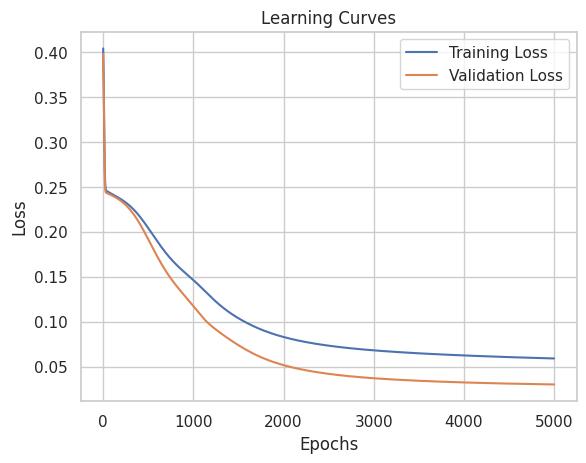

In [83]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=5000)


mlp.plot_learning_curves()


decision plane:

accuracy: 0.765


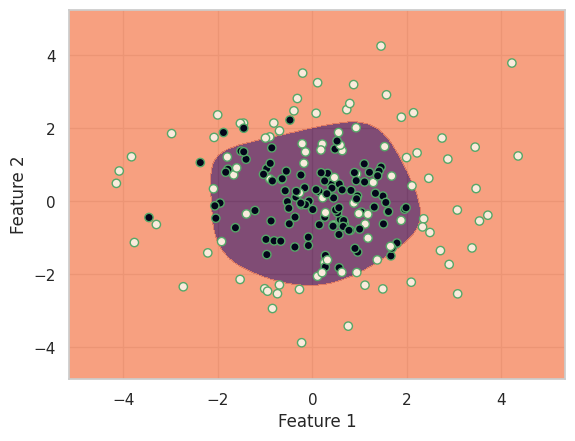

In [86]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=3000)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)


## **2. Spiral dataset**

chossing best k:

In [100]:
X = data_spiral.drop('label', axis = 1).values
y = data_spiral['label'].values

X_val = val_data_spiral.drop('label', axis = 1).values
y_val = val_data_spiral['label'].values

X_test = test_data_spiral.drop('label', axis = 1).values
y_test = test_data_spiral['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP_MSE(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=3000)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_spiral = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k_spiral}, Accuracy: {model_performance[best_k_spiral - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.7987
Hidden Size: 6, Average Accuracy: 0.8083
Hidden Size: 7, Average Accuracy: 0.8075
Hidden Size: 8, Average Accuracy: 0.8183
Hidden Size: 9, Average Accuracy: 0.8063
Hidden Size: 10, Average Accuracy: 0.8095
Hidden Size: 11, Average Accuracy: 0.8017
Hidden Size: 12, Average Accuracy: 0.7980
Hidden Size: 13, Average Accuracy: 0.7988
Hidden Size: 14, Average Accuracy: 0.7975
Hidden Size: 15, Average Accuracy: 0.7952
Hidden Size: 16, Average Accuracy: 0.7983
Hidden Size: 17, Average Accuracy: 0.7953
Hidden Size: 18, Average Accuracy: 0.7958
Hidden Size: 19, Average Accuracy: 0.7953
Hidden Size: 20, Average Accuracy: 0.7952
Hidden Size: 21, Average Accuracy: 0.7953
Hidden Size: 22, Average Accuracy: 0.7950
Hidden Size: 23, Average Accuracy: 0.7955
Hidden Size: 24, Average Accuracy: 0.8013
Hidden Size: 25, Average Accuracy: 0.7973
Hidden Size: 26, Average Accuracy: 0.7950
Hidden Size: 27, Average Accuracy: 0.7985
Hidden Size: 28, Average Accuracy: 0.79

choosing epoch numbers

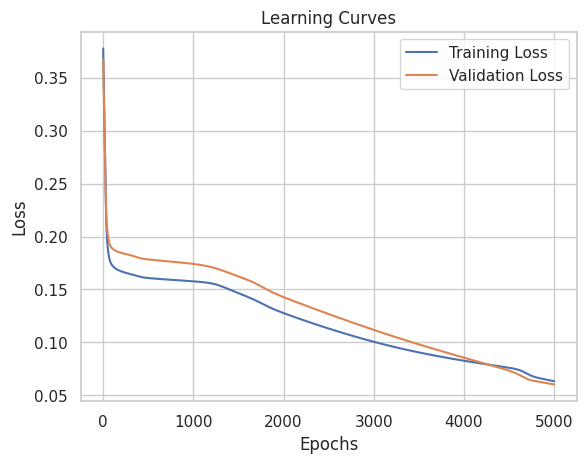

In [103]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_spiral, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=5000)

mlp.plot_learning_curves()

decision plane

accuracy: 0.825


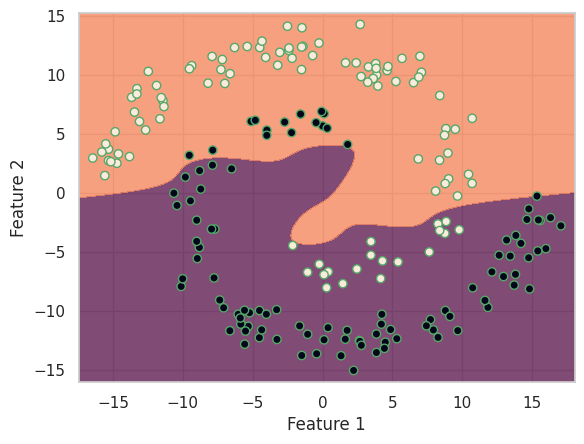

In [104]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_spiral, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=3000)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

## **3. Two Gaussian dataset**

choosing best k:

In [105]:
X = data_gaussian.drop('label', axis = 1).values
y = data_gaussian['label'].values

X_val = val_data_gaussian.drop('label', axis = 1).values
y_val = val_data_gaussian['label'].values

X_test = test_data_gaussian.drop('label', axis = 1).values
y_test = test_data_gaussian['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP_MSE(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=1000)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_gaussian = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k_gaussian}, Accuracy: {model_performance[best_k_gaussian - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.9147
Hidden Size: 6, Average Accuracy: 0.9145
Hidden Size: 7, Average Accuracy: 0.9130
Hidden Size: 8, Average Accuracy: 0.9117
Hidden Size: 9, Average Accuracy: 0.9115
Hidden Size: 10, Average Accuracy: 0.9137
Hidden Size: 11, Average Accuracy: 0.9113
Hidden Size: 12, Average Accuracy: 0.9155
Hidden Size: 13, Average Accuracy: 0.9153
Hidden Size: 14, Average Accuracy: 0.9185
Hidden Size: 15, Average Accuracy: 0.9205
Hidden Size: 16, Average Accuracy: 0.9193
Hidden Size: 17, Average Accuracy: 0.9223
Hidden Size: 18, Average Accuracy: 0.9238
Hidden Size: 19, Average Accuracy: 0.9015
Hidden Size: 20, Average Accuracy: 0.8715
Hidden Size: 21, Average Accuracy: 0.8680
Hidden Size: 22, Average Accuracy: 0.8265
Hidden Size: 23, Average Accuracy: 0.7998
Hidden Size: 24, Average Accuracy: 0.6025
Hidden Size: 25, Average Accuracy: 0.6628
Hidden Size: 26, Average Accuracy: 0.6075
Hidden Size: 27, Average Accuracy: 0.5578
Hidden Size: 28, Average Accuracy: 0.58

choosing epoch number

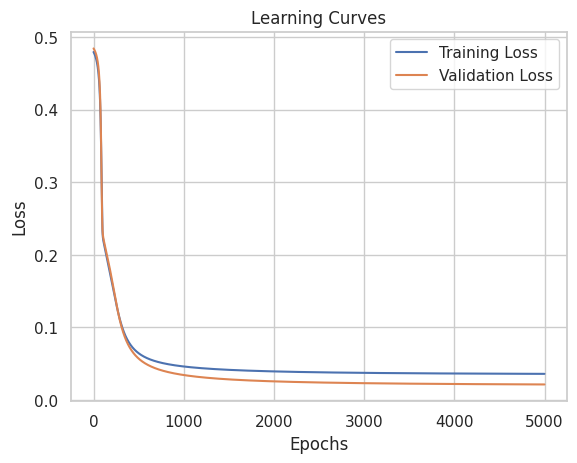

In [109]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_gaussian, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=5000)

mlp.plot_learning_curves()

decision plane

accuracy: 0.925


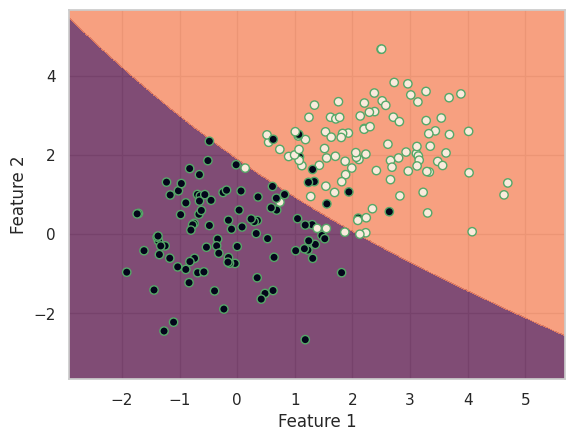

In [107]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_gaussian, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=1000)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

## **4. Xor dataset**

choosing best k

In [110]:
X = data_xor.drop('label', axis = 1).values
y = data_xor['label'].values

X_val = val_data_xor.drop('label', axis = 1).values
y_val = val_data_xor['label'].values

X_test = test_data_xor.drop('label', axis = 1).values
y_test = test_data_xor['label'].values

num_iter = 20
hidden_layer_sizes = range(5, 30)
model_performance = [0] * len(hidden_layer_sizes)

for i in range(num_iter):
  for j, hidden_size in enumerate(hidden_layer_sizes):
      mlp = MLP_MSE(input_size=2, hidden_size=hidden_size, output_size=1, learning_rate=0.01)
      mlp.train(X, y, X_val, y_val, epochs=3000)

      accuracy = mlp.compute_accuracy(X_test, y_test)
      predictions = mlp.predict(X_test).astype(int)

      model_performance[j] += accuracy

model_performance = np.array([i / num_iter for i in model_performance])
for i, perform in enumerate(model_performance):
  print(f"Hidden Size: {i + 5}, Average Accuracy: {perform:.4f}")
best_k_xor = model_performance.argmax() + 5

print(f"Best Model - best k: {best_k_xor}, Accuracy: {model_performance[best_k_xor - 5]:.4f}")

Hidden Size: 5, Average Accuracy: 0.7787
Hidden Size: 6, Average Accuracy: 0.7938
Hidden Size: 7, Average Accuracy: 0.7960
Hidden Size: 8, Average Accuracy: 0.7933
Hidden Size: 9, Average Accuracy: 0.7565
Hidden Size: 10, Average Accuracy: 0.7787
Hidden Size: 11, Average Accuracy: 0.7485
Hidden Size: 12, Average Accuracy: 0.7245
Hidden Size: 13, Average Accuracy: 0.7248
Hidden Size: 14, Average Accuracy: 0.7055
Hidden Size: 15, Average Accuracy: 0.6925
Hidden Size: 16, Average Accuracy: 0.6705
Hidden Size: 17, Average Accuracy: 0.6537
Hidden Size: 18, Average Accuracy: 0.6365
Hidden Size: 19, Average Accuracy: 0.6253
Hidden Size: 20, Average Accuracy: 0.6287
Hidden Size: 21, Average Accuracy: 0.6092
Hidden Size: 22, Average Accuracy: 0.5873
Hidden Size: 23, Average Accuracy: 0.5687
Hidden Size: 24, Average Accuracy: 0.5573
Hidden Size: 25, Average Accuracy: 0.5440
Hidden Size: 26, Average Accuracy: 0.5370
Hidden Size: 27, Average Accuracy: 0.5033
Hidden Size: 28, Average Accuracy: 0.48

chossing epoch number:

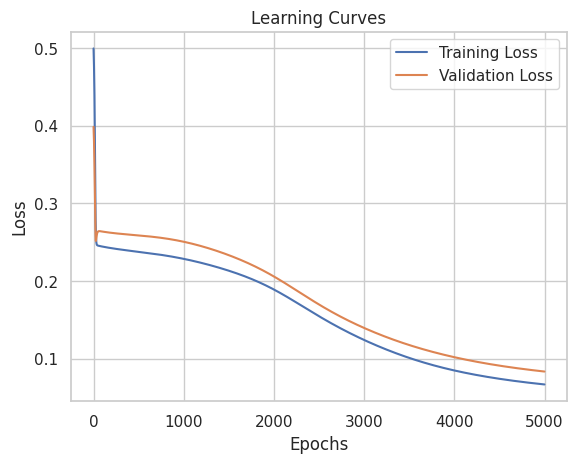

In [111]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_xor, output_size=1, learning_rate=0.01)

# TODO 这里的epochs可以改改 越高越overfitting 但正确率越高
mlp.train(X, y, X_val, y_val, epochs=5000)

mlp.plot_learning_curves()

decision plane:

accuracy: 0.91


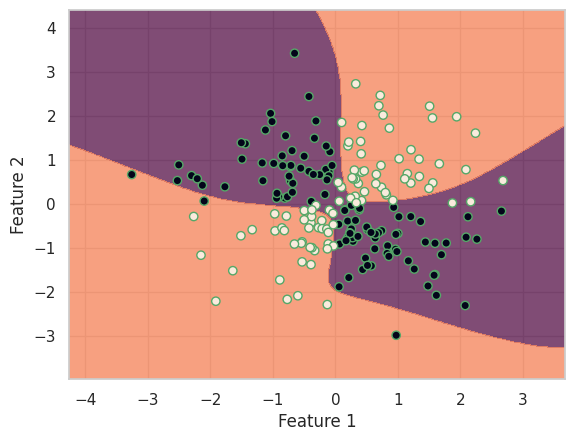

In [129]:
mlp = MLP_MSE(input_size=2, hidden_size=best_k_xor, output_size=1, learning_rate=0.01)
mlp.train(X, y, X_val, y_val, epochs=4000)
print(f"accuracy: {mlp.compute_accuracy(X_test, y_test)}")
mlp.plot_decision_surface(X_test, y_test)

# Problem 5


In [165]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [181]:
model = Sequential([
    Dense(64, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Configure Early Stopping
early_stopping = EarlyStopping(monitor='accuracy', patience=15, restore_best_weights=True)

In [182]:
X = data_xor.drop('label', axis = 1).values
y = data_xor['label'].values

X_val = val_data_xor.drop('label', axis = 1).values
y_val = val_data_xor['label'].values

X_test = test_data_xor.drop('label', axis = 1).values
y_test = test_data_xor['label'].values

history = model.fit(X, y, epochs=300, verbose=1, callbacks=[early_stopping])

Epoch 1/300
7/7 [==============================] - 1s 6ms/step - loss: 0.6647 - accuracy: 0.5600
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7500
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 0.4689 - accuracy: 0.8700
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3986 - accuracy: 0.9400
Epoch 5/300
7/7 [==============================] - 0s 5ms/step - loss: 0.3488 - accuracy: 0.9650
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2964 - accuracy: 0.9750
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 0.2580 - accuracy: 0.9650
Epoch 8/300
7/7 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9550
Epoch 9/300
7/7 [==============================] - 0s 7ms/step - loss: 0.2049 - accuracy: 0.9600
Epoch 10/300
7/7 [==============================] - 0s 5ms/step - loss: 0.1853 - accuracy: 0.9650
Epoch 11/300
7/7 [===========

In [183]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.9900000095367432


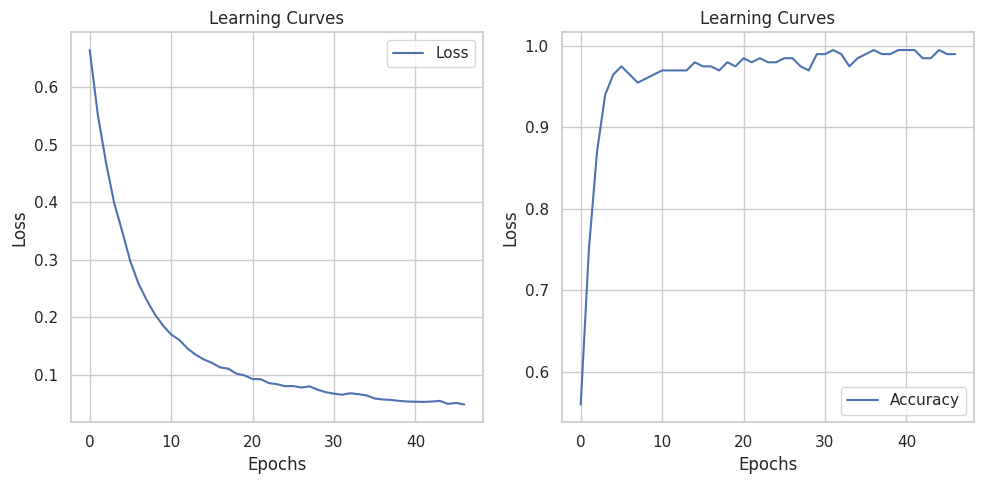

In [184]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label='Loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label='Accuracy')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

877/877 [==============================] - 3s 3ms/step


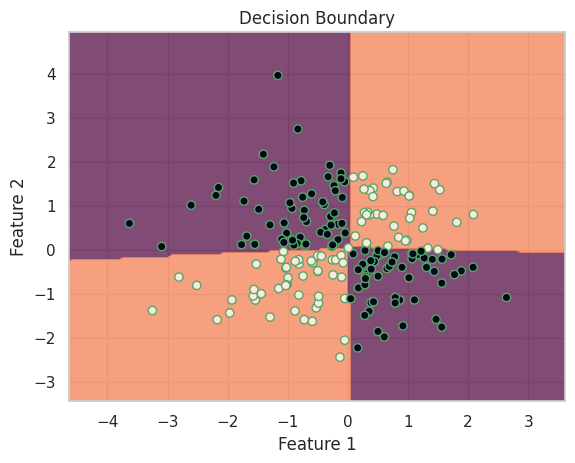

In [187]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_points)
predictions = predictions > 0.5
predictions = predictions.reshape(xx.shape)

plt.contourf(xx, yy, predictions, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='g')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()